<a href="https://colab.research.google.com/github/MrVer0n/-/blob/main/%D0%98%D0%92%D0%A12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Задание на 1 лабораторную работу.**

1. Найти тестовыую выборку на стоке. Поделить её на обучающую выборку и тестовую (любым методом).

  1.1 Определить входные и выходные переменные. Проанализировав.

  1.2 Задать функции принадлежности переменным (4 вида-стандартных) или 1-2 подходящих. Определить метод.

  1.3 Построить базу правил. Аппроксиматор - много входов, один выход.



*  Использовать метод полного перебора. На основе метода построить базу правил.
*  Выбрать методы инициализации для входных и выходного параметров (для системы нечётного вывода).

## **Установка библиотек, подготовка**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=b51eb82d61b154a5d53d345a1fbb0a293cddf7a4e2a7bbf74f58cf660d42c8d6
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
import itertools
from sklearn.model_selection import train_test_split
from google.colab.data_table import DataTable
from skfuzzy import control as ctrl

##**1.1**

Входные переменные и их важность(степень влияния на выходную):

*   Quality of Sleep           0.883213
*   Age                        0.344709
*   Physical Activity Level    0.212360

Выходная переменная:

*   Sleep Duration             


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/ИВС/Sleep_health_and_lifestyle_dataset.csv', sep=',', encoding='cp1251')
DataTable.max_columns = 30
pd.set_option('display.max_columns', 30)
DataTable(df, include_index=False, num_rows_per_page=10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df['Age'].value_counts()

43    34
44    30
37    20
38    20
50    20
31    18
32    17
53    17
59    16
39    15
45    14
33    13
30    13
29    13
35    12
36    12
41    12
49    11
57     9
52     9
42     9
51     8
54     7
58     6
28     5
40     4
48     3
55     2
56     2
34     2
27     1
Name: Age, dtype: int64

In [ ]:
missing_values = df.isnull().sum()
print("Пропущенные значения:")
print(missing_values)

Пропущенные значения:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


<ipython-input-7-f24e6440e4bb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


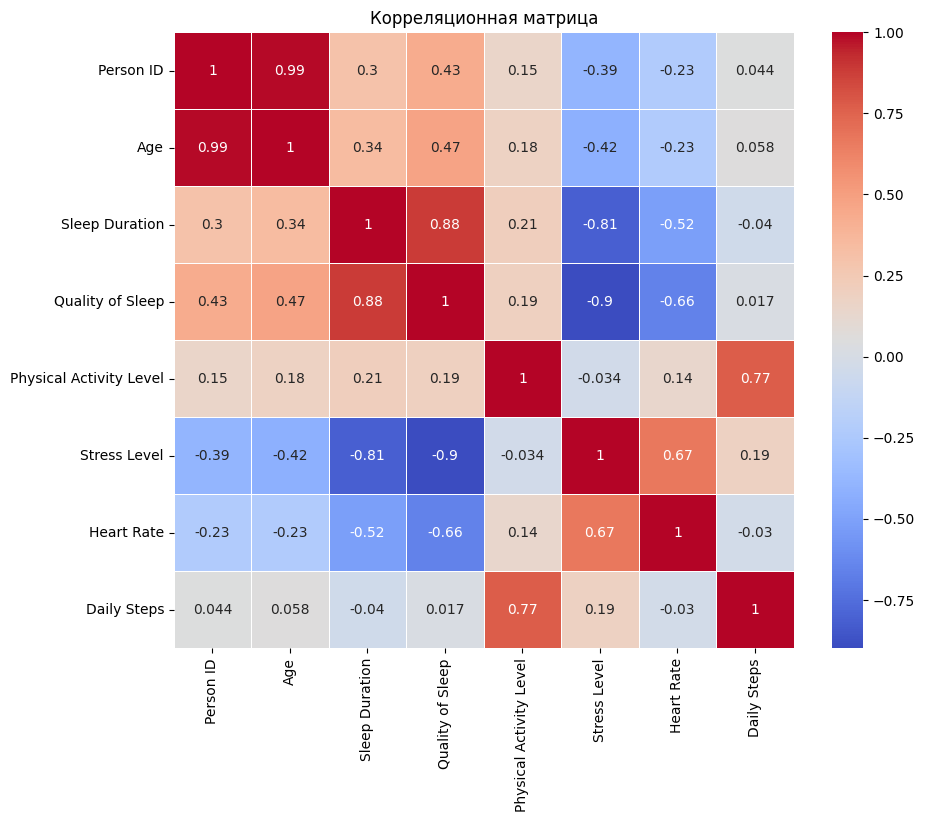

Наиболее влияющие факторы:
Sleep Duration             1.000000
Quality of Sleep           0.883213
Age                        0.344709
Person ID                  0.296305
Physical Activity Level    0.212360
Daily Steps               -0.039533
Heart Rate                -0.516455
Stress Level              -0.811023
Name: Sleep Duration, dtype: float64


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/ИВС/Sleep_health_and_lifestyle_dataset.csv')

correlation_matrix = data.corr()

# Матрица корреляции с использованием тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

# Корреляции между Основным и остальными признаками
correlations_with_potability = correlation_matrix['Sleep Duration'].sort_values(ascending=False)

print("Наиболее влияющие факторы:")
print(correlations_with_potability)

##**1.2**
Задаю функции принадлежности переменным. Определяю метод.

Выбрать методы инициализации для входных и выходного параметров (для системы нечётного вывода).

Метод - Такаги-Сугено (ТС):

Метод треугольных функций принадлежности.

Не использует функции принадлежности для определения выходного значения.
Вместо этого каждое правило имеет явно заданное выражение для определения выходного значения на основе активированных условий.
Дефаззификация в методе Такаги-Сугено выполняется непосредственно с помощью вычисления выходного значения на основе активированных правил и их выражений.

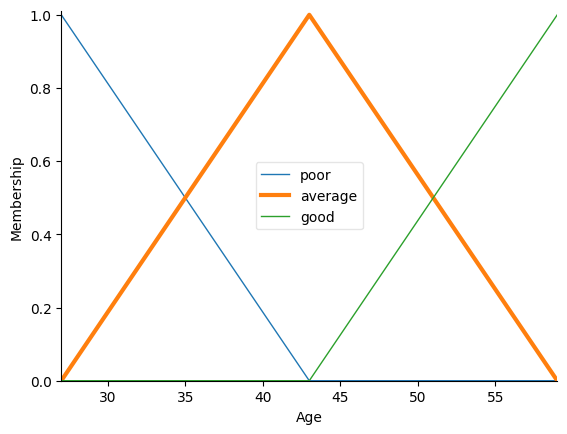

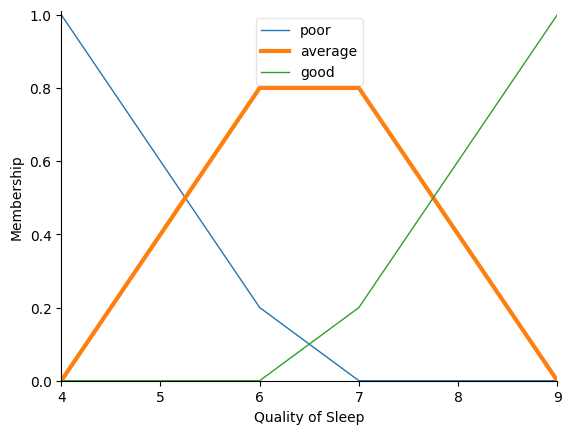

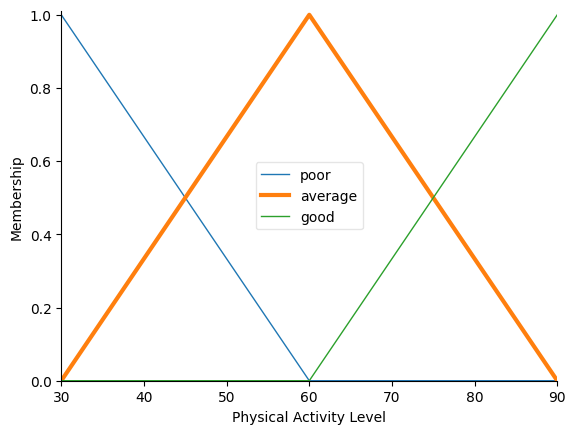

In [ ]:
# Загружаю данные
data = pd.read_csv('/content/gdrive/MyDrive/ИВС/Sleep_health_and_lifestyle_dataset.csv')

output = ctrl.Consequent(sorted(data['Sleep Duration']), 'output')

age = ctrl.Antecedent(sorted(data['Age']), 'Age')
quality_of_sleep  = ctrl.Antecedent(sorted(data['Quality of Sleep']), 'Quality of Sleep')
physical_activity_level = ctrl.Antecedent(sorted(data['Physical Activity Level']), 'Physical Activity Level')
#sleep_duration = ctrl.Antecedent(data['Sleep Duration'], 'Sleep Duration')


# Определяю функций принадлежности
quality_of_sleep.automf(3)
age.automf(3)
physical_activity_level.automf(3)
output.automf(3)

# Какие то графики
age['average'].view()
quality_of_sleep['average'].view()
physical_activity_level['average'].view()

## **1.3**
Строю базу правил.

Использую метод полного перебора.

In [ ]:
# Уровни переменных
quality_of_sleep_levels = ['poor', 'average', 'good']
age_levels = ['poor', 'average', 'good']
physical_activity_levels = ['poor', 'average', 'good']

# Все комбинации входных условий
input_combinations = list(itertools.product(quality_of_sleep_levels, age_levels, physical_activity_levels))

# Массив правил на основе полного перебора
rule_base = []

for combination in input_combinations:
    quality, age, activity = combination
    if quality == 'poor' and age == 'poor' and activity == 'poor':
        output = 'poor'
    elif quality == 'average' and age == 'average' and activity == 'average':
        output = 'average'
    elif quality == 'good' and age == 'good' and activity == 'good':
        output = 'good'
    else:
        txt = input(f"IF Quality - {quality}, Age - {age}, Activity - {activity}, THEN Sleep Duration - ")
        if txt == '1':
          output = 'poor'
        elif txt == '2':
          output = 'average'
        elif txt == '3':
          output = 'good'


    rule_base.append((combination, output))

# Вывод
for rule in rule_base:
    input_conditions, output = rule
    print(f"IF Quality of Sleep is {input_conditions[0]}, Age is {input_conditions[1]}, and Physical Activity Level is {input_conditions[2]}, THEN Sleep Duration is {output}")

IF Quality - poor, Age - poor, Activity - average, THEN Sleep Duration - 1
IF Quality - poor, Age - poor, Activity - good, THEN Sleep Duration - 1
IF Quality - poor, Age - average, Activity - poor, THEN Sleep Duration - 1
IF Quality - poor, Age - average, Activity - average, THEN Sleep Duration - 1
IF Quality - poor, Age - average, Activity - good, THEN Sleep Duration - 1
IF Quality - poor, Age - good, Activity - poor, THEN Sleep Duration - 1
IF Quality - poor, Age - good, Activity - average, THEN Sleep Duration - 1
IF Quality - poor, Age - good, Activity - good, THEN Sleep Duration - 1
IF Quality - average, Age - poor, Activity - poor, THEN Sleep Duration - 2
IF Quality - average, Age - poor, Activity - average, THEN Sleep Duration - 2
IF Quality - average, Age - poor, Activity - good, THEN Sleep Duration - 2
IF Quality - average, Age - average, Activity - poor, THEN Sleep Duration - 2
IF Quality - average, Age - average, Activity - good, THEN Sleep Duration - 2
IF Quality - average, 

Аппроксиматор - много входов, один выход.

In [ ]:
# Строю базы правил
rules = []
for rule in rule_base:
    input_conditions, output_value = rule
    rules.append(ctrl.Rule(quality_of_sleep[input_conditions[0]] & age[input_conditions[1]] & physical_activity_level[input_conditions[2]], output[output_value]))
print(rules)

# Система управления
system = ctrl.ControlSystem(rules)
# Симулятор
simulator = ctrl.ControlSystemSimulation(system)

# Тест набор
data_test = pd.read_csv('/content/gdrive/MyDrive/ИВС/Sleep_health_and_lifestyle_dataset_test.csv')

for idx, row in data_test.iterrows():
    simulator.input['Quality of Sleep'] = row['Quality of Sleep']
    simulator.input['Age'] = row['Age']
    simulator.input['Physical Activity Level'] = row['Physical Activity Level']

    simulator.compute()
    predicted_paymentTier = simulator.output['output']

    print(f"Predicted: {predicted_paymentTier:.1f}, Actual : {data_test['Sleep Duration'][idx]}")

[IF (Quality of Sleep[poor] AND Age[poor]) AND Physical Activity Level[poor] THEN output[poor]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF (Quality of Sleep[poor] AND Age[poor]) AND Physical Activity Level[average] THEN output[poor]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF (Quality of Sleep[poor] AND Age[poor]) AND Physical Activity Level[good] THEN output[poor]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF (Quality of Sleep[poor] AND Age[average]) AND Physical Activity Level[poor] THEN output[poor]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF (Quality of Sleep[poor] AND Age[average]) AND Physical Activity Level[average] THEN output[poor]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF (Quality of Sleep[poor] AND Age[average]) AND Physical Activity Level[good] THEN output[poor]
	AND aggregation function : fmin
	OR aggregation function  : fmax, IF (Quality of Sle